In [21]:
import pandas as pd
from sklearn.model_selection import GridSearchCV
import warnings
import shap
import numpy as np
import matplotlib.pyplot as plt

In [22]:
warnings.filterwarnings('ignore')

In [23]:
train_X = pd.read_csv('../data/curated/final_train_X.csv')
val_X = pd.read_csv('../data/curated/final_val_X.csv')
test_X = pd.read_csv('../data/curated/final_test_X.csv')
train_Y = pd.read_csv('../data/curated/train_Y.csv')
val_Y = pd.read_csv('../data/curated/val_Y.csv')

In [24]:
from sklearn.ensemble import RandomForestClassifier

In [25]:
clf = RandomForestClassifier(ccp_alpha=1e-08, max_depth=8, max_features=1,
                       max_samples=0.55, random_state=42)

In [26]:
clf.fit(X=train_X, y=train_Y)

RandomForestClassifier(ccp_alpha=1e-08, max_depth=8, max_features=1,
                       max_samples=0.55, random_state=42)

In [27]:
from sklearn.metrics import accuracy_score

In [28]:
accuracy_score = accuracy_score(y_pred=clf.predict(X=val_X), y_true=val_Y)

In [29]:
accuracy_score

0.7932960893854749

In [30]:
rf_pred = clf.predict(X=test_X)

In [31]:
raw_test_X = pd.read_csv('../data/raw/test.csv')

In [32]:
prediction = pd.DataFrame({
    'PassengerId': raw_test_X['PassengerId'],
    'Survived': rf_pred
})

In [33]:
prediction

,PassengerId,Survived
0,892,0
1,893,1
2,894,0
3,895,0
4,896,1
...,...,...
413,1305,0
414,1306,1
415,1307,0
416,1308,0


In [34]:
prediction.to_csv('../data/curated/rf_pred.csv', index=False)

In [35]:
importance = clf.feature_importances_

In [36]:
index = np.argsort(importance)[::-1]

In [37]:
index

array([ 8, 23,  4,  7,  1,  6, 24,  0,  5,  2, 20,  3, 11, 80,  9, 83, 81,
       41, 50, 82, 19, 10, 44, 84, 75, 71, 43, 15, 35, 26, 72, 17, 79, 46,
       64, 59, 34, 18, 21, 22, 55, 68, 49, 62, 58, 25, 78, 40, 32, 65, 45,
       13, 70, 85, 12, 30, 69, 33, 53, 42, 51, 77, 28, 74, 76, 63, 66, 37,
       54, 31, 47, 52, 56, 36, 14, 48, 57, 60, 61, 39, 67, 38, 73, 27, 29,
       16])

In [38]:
index.shape[0]

86

In [39]:
importance[index]

array([0.11987478, 0.09408608, 0.08184051, 0.07590317, 0.07258737,
       0.06324498, 0.06014463, 0.05292894, 0.04823261, 0.04011641,
       0.03834979, 0.02501036, 0.02160022, 0.0173914 , 0.01714984,
       0.01517194, 0.01119369, 0.01064514, 0.00978361, 0.00958203,
       0.00797923, 0.00647296, 0.00639307, 0.00635937, 0.0056353 ,
       0.00494846, 0.00467237, 0.00400248, 0.00394371, 0.00362924,
       0.0031518 , 0.00299379, 0.00290454, 0.00280549, 0.00262422,
       0.00243126, 0.00234312, 0.00199107, 0.00197081, 0.00190117,
       0.00185938, 0.00180087, 0.00169739, 0.00168213, 0.00167246,
       0.00166307, 0.00157766, 0.00157079, 0.00154998, 0.00149711,
       0.00137192, 0.00134386, 0.0013244 , 0.00130551, 0.00129783,
       0.00116657, 0.0010934 , 0.00108232, 0.0010801 , 0.00097366,
       0.00096454, 0.00096418, 0.00092247, 0.00084876, 0.00080544,
       0.0006638 , 0.00053021, 0.00036229, 0.00032927, 0.00028809,
       0.00025521, 0.00019841, 0.00013726, 0.00012868, 0.     

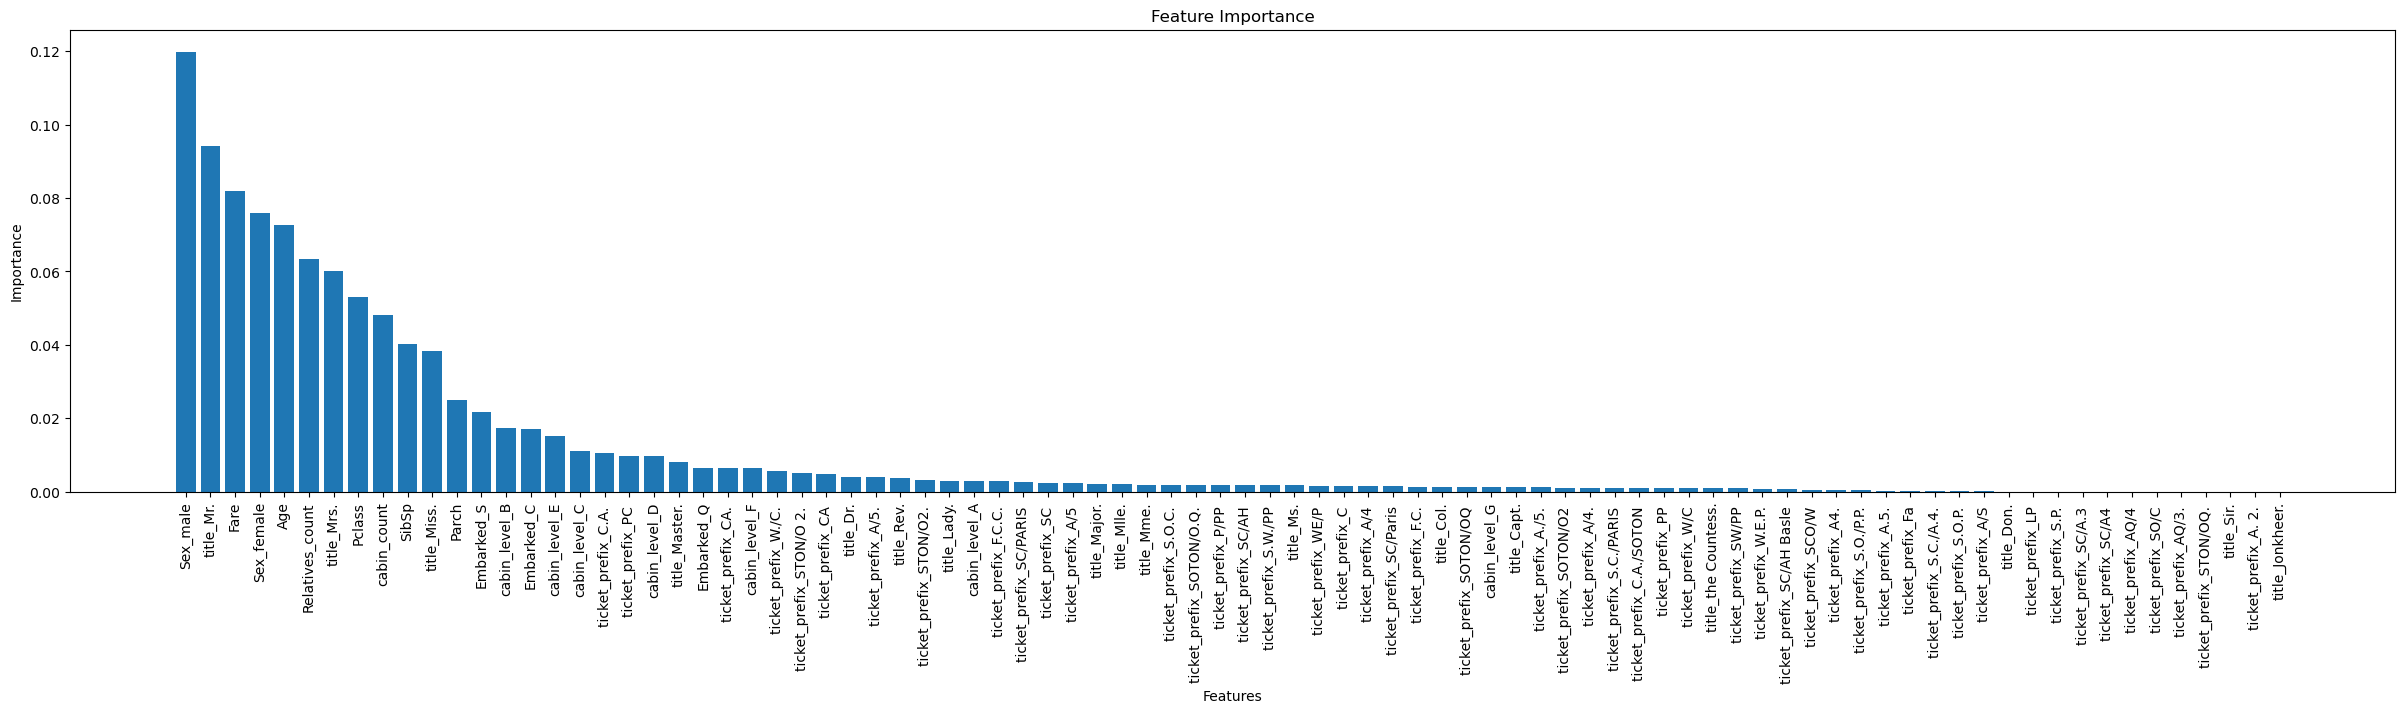

In [40]:
plt.figure(figsize=(30,6))
plt.bar(range(index.shape[0]), importance[index], align='center')
plt.xticks(range(index.shape[0]), (train_X.columns[i] for i in index), rotation=90)
plt.title('Feature Importance')
plt.xlabel('Features')
plt.ylabel('Importance')
plt.savefig('../plot/rf_featrue_importance.png')
plt.show()